In [122]:
import pandas as pd
import matplotlib.pyplot  as plt 
import seaborn as sns 
import numpy as np 

In [77]:
data = pd.read_csv('C:\\Users\\home\\Downloads\\bank-additional.csv',sep = ';')

In [78]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
age               4119 non-null int64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
pdays             4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp.var.rate      4119 non-null float64
cons.price.idx    4119 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
y                 4119 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 675.9+ KB


In [5]:
data.shape

(4119, 21)

In [6]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
data.columns


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [42]:
#data['outcome'] = data.y.map({'no' : 0 ,'yes' : 1})

(4119, 21)

In [8]:
data['y'].value_counts()

no     3668
yes     451
Name: y, dtype: int64

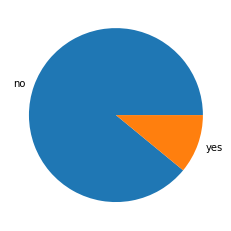

In [10]:
plt.pie(data['y'].value_counts(),labels = ['no','yes'])
plt.show()

In [79]:
for col in data.select_dtypes('object').columns:
    data[col] = data[col].astype('category')

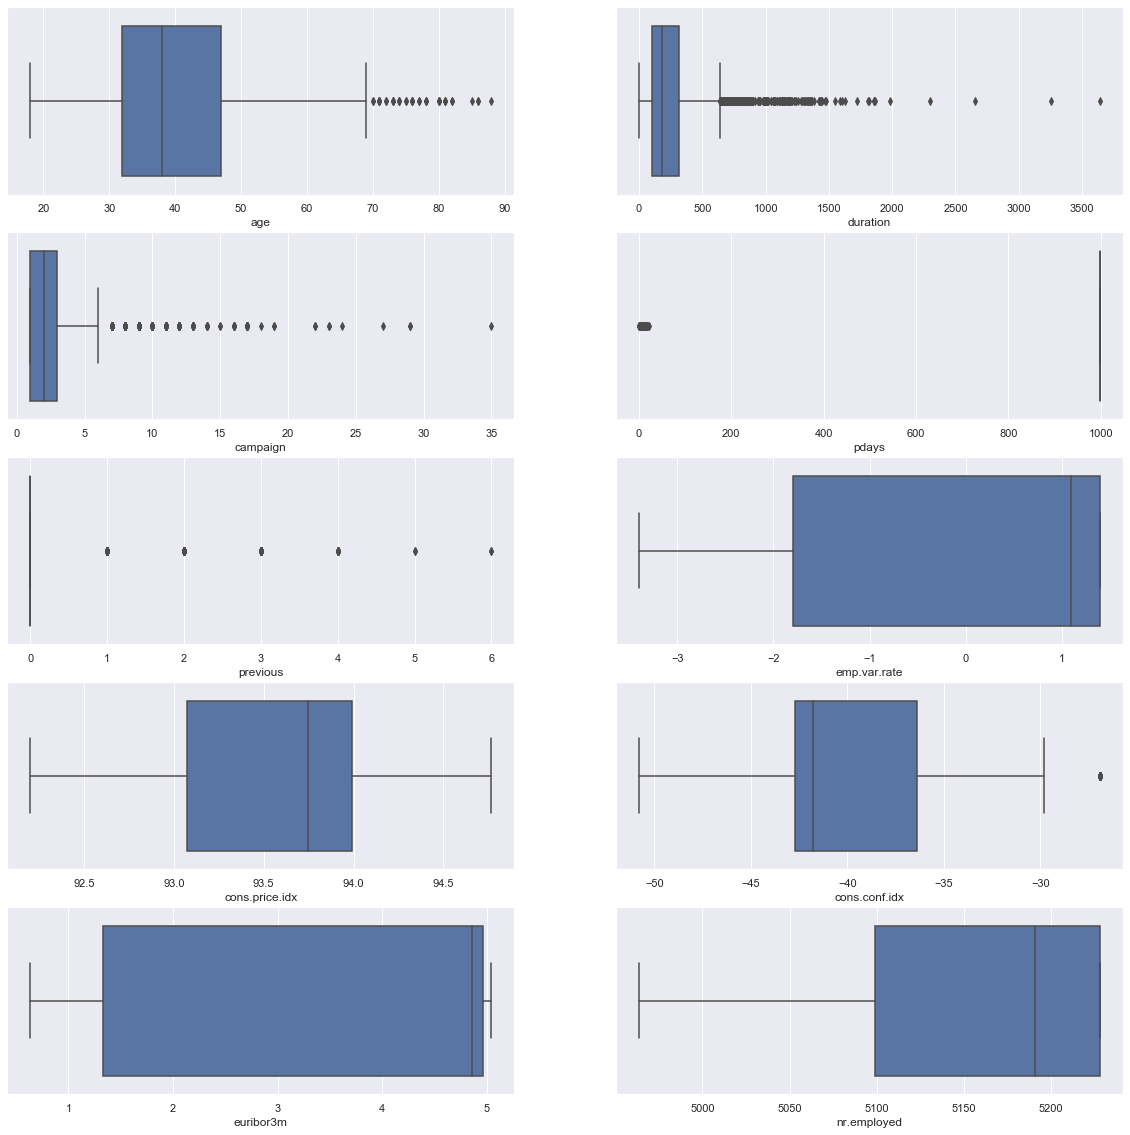

In [12]:
sns.set()
fig = plt.figure(figsize=(20,20))
i=1
for col in data.select_dtypes(['int64','float64']):
    plt.subplot(5,2,i)
    sns.boxplot(data[col])
    i = i+1
plt.show()

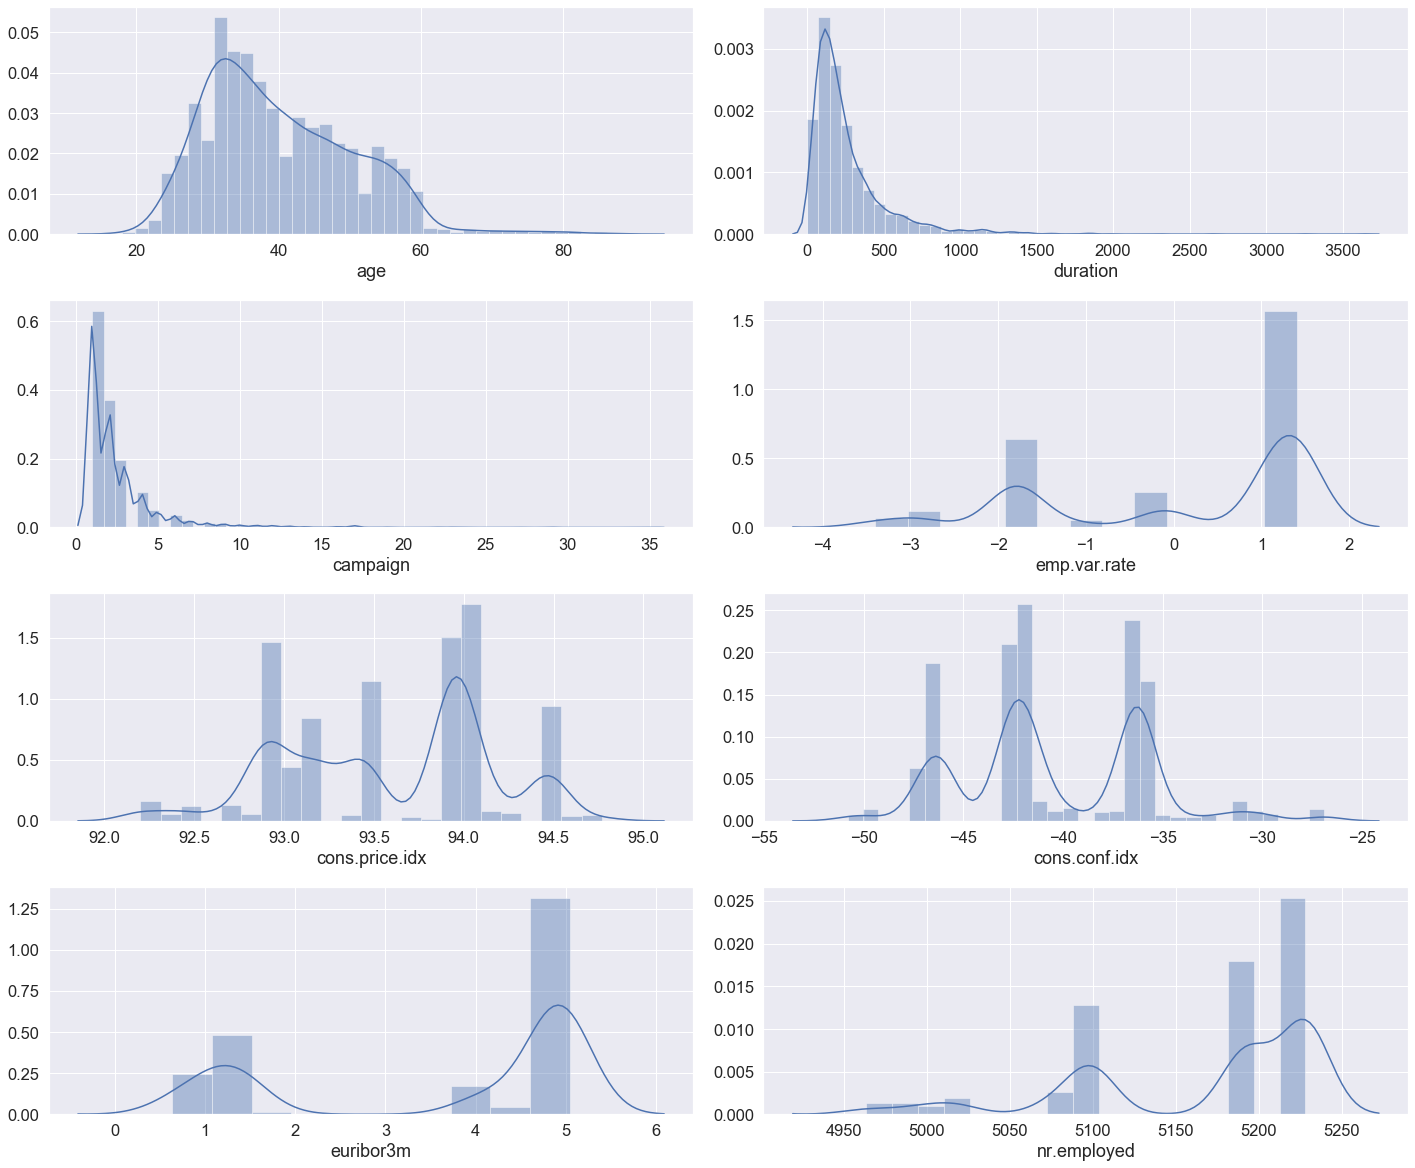

In [64]:
i = 1 
fig =plt.figure(figsize=(20,20))
for col in ['age','duration','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']:
    plt.subplot(5,2,i)
    sns.distplot(data[col])
    i= i+1
plt.tight_layout()
plt.show()

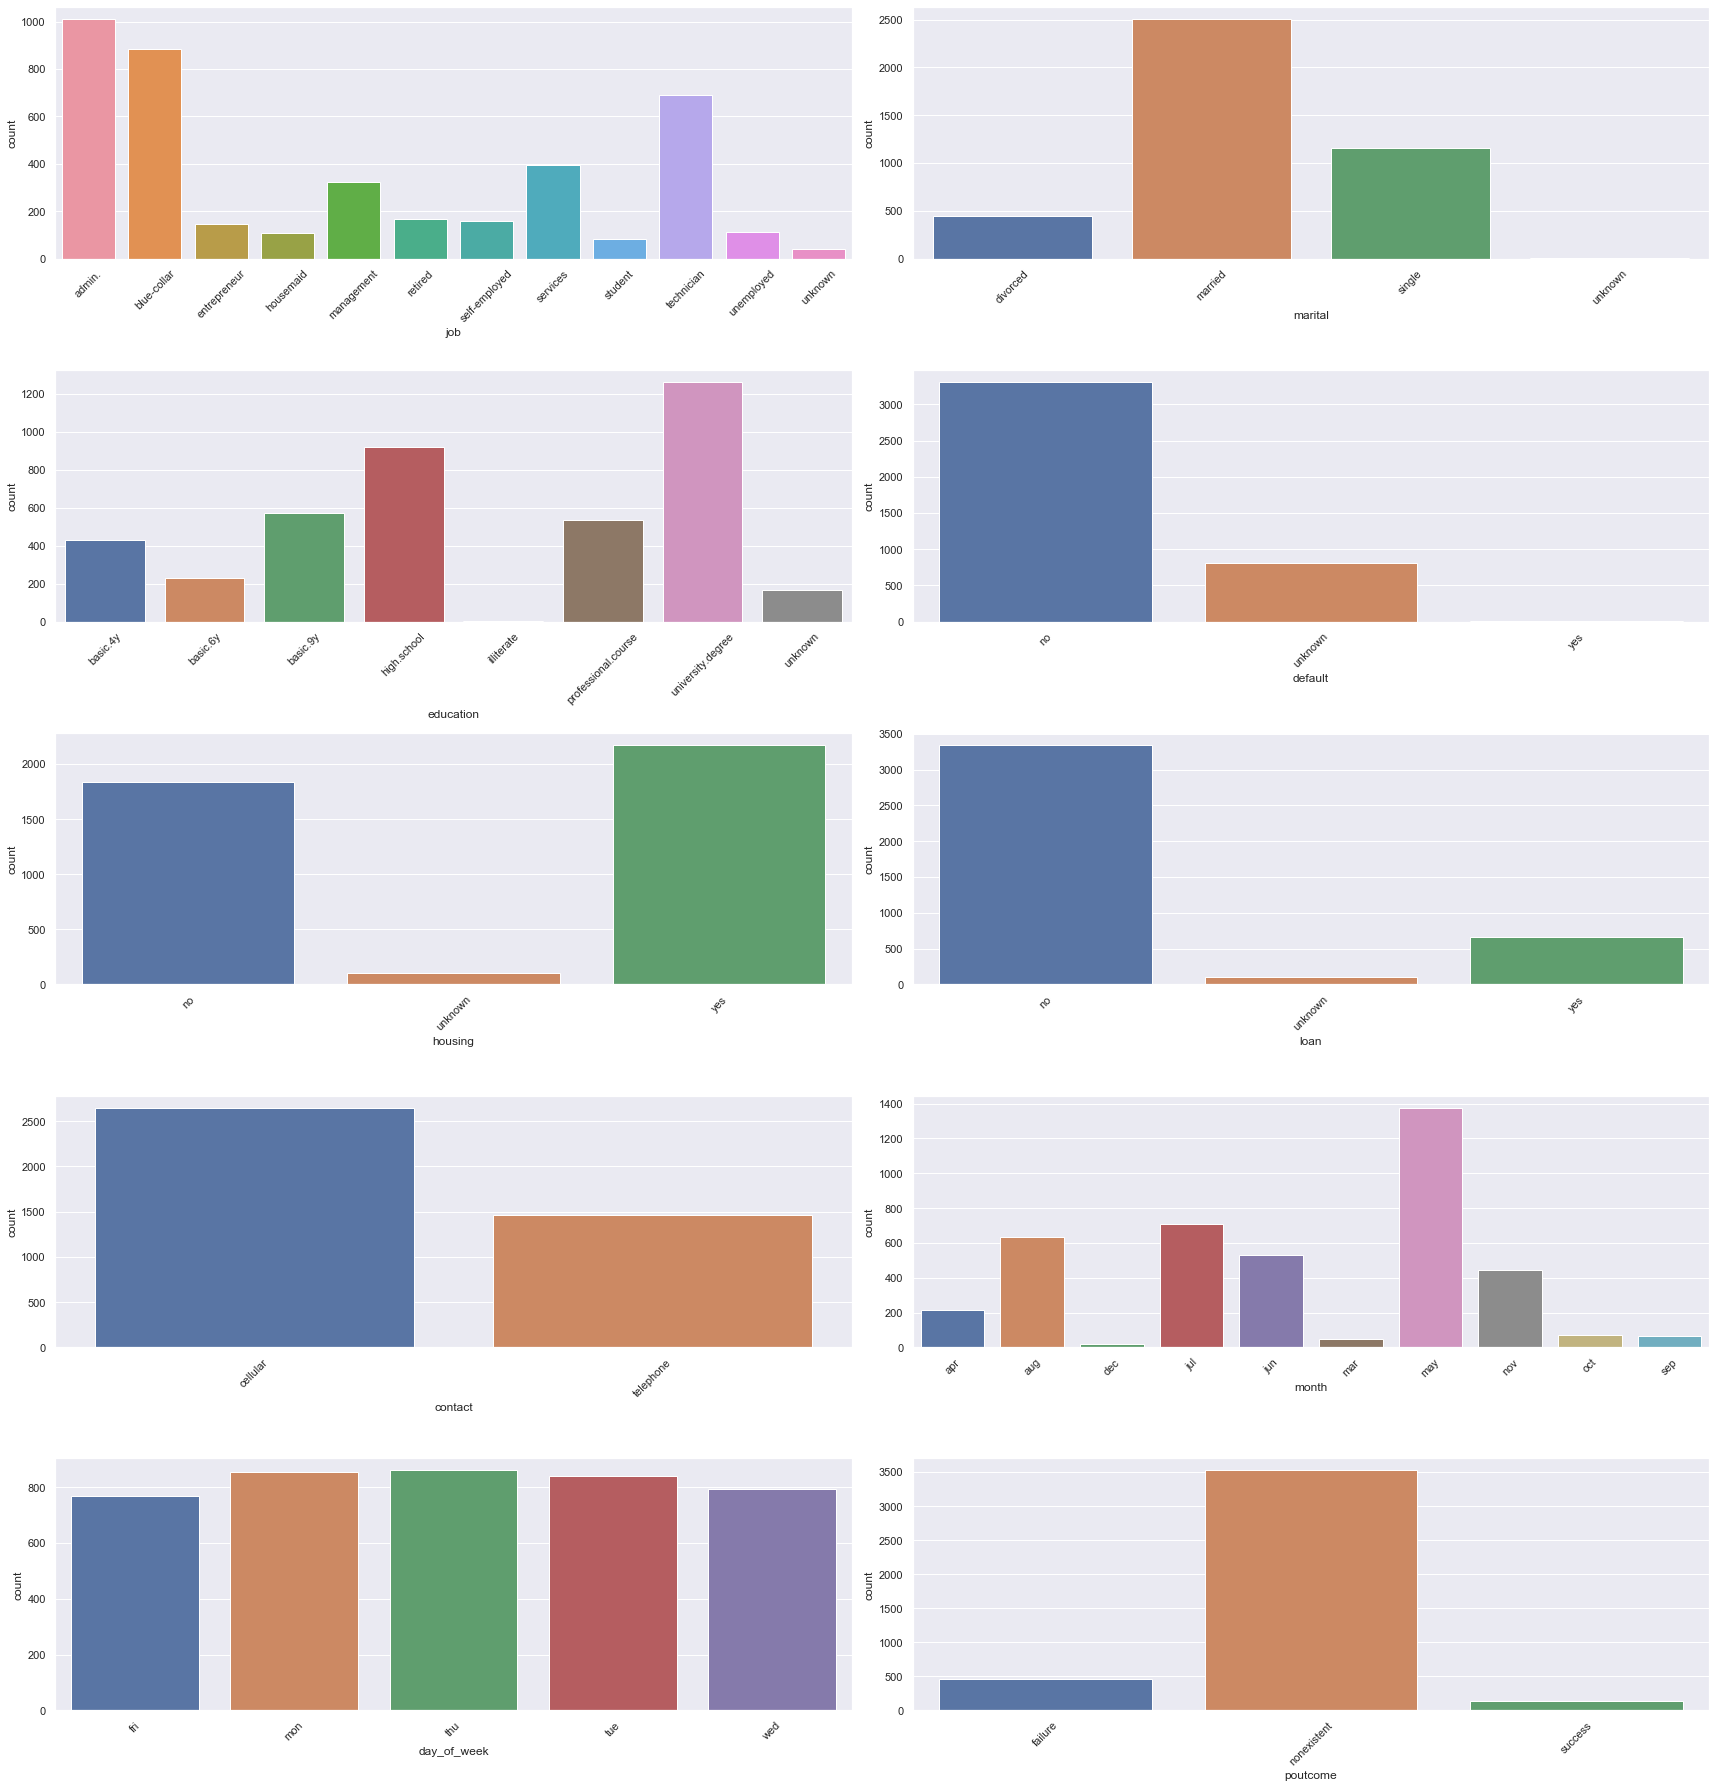

In [17]:
sns.set()
fig =plt.figure(figsize=(24,25))
i = 1
for col in data.select_dtypes('category'):
    if col!= 'y':
        plt.subplot(5,2,i)
        sns.countplot(data[col])
        i = i+1
        plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

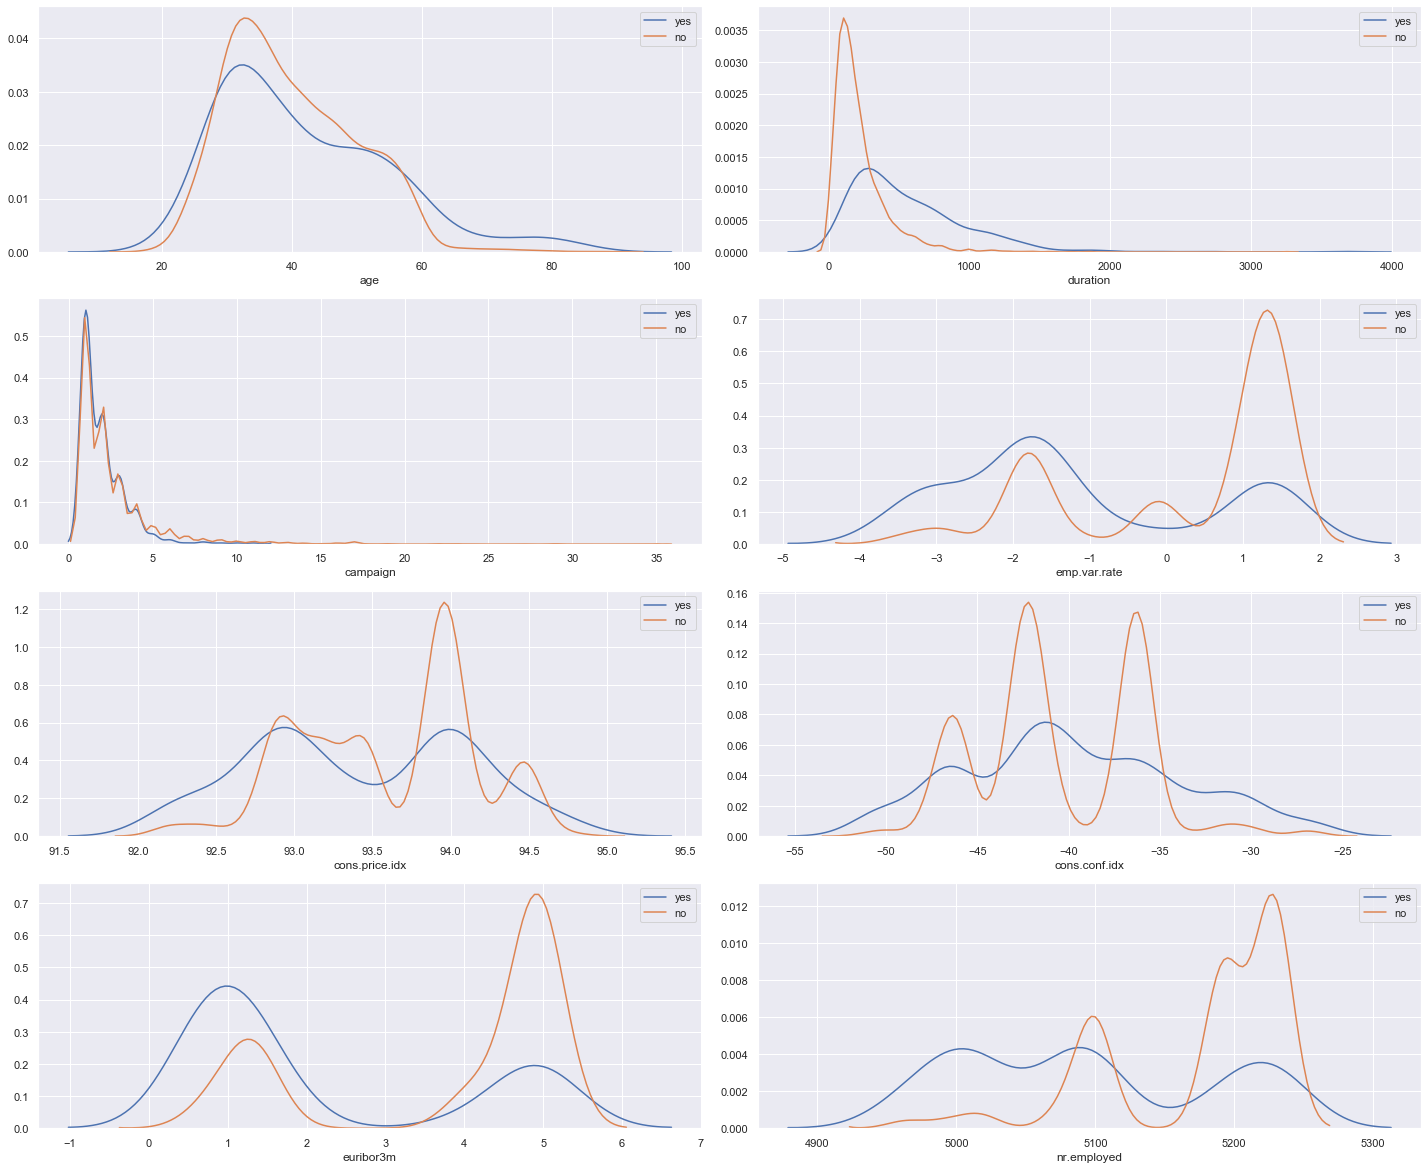

In [37]:
sns.set()
i = 1
fig= plt.figure(figsize =(20,20))
for col in ['age','duration','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']:
    plt.subplot(5,2,i)
    sns.distplot(data[col][data['y'] == 'yes'],hist= False,label= 'yes')
    sns.distplot(data[col][data['y'] == 'no'],hist= False,label='no')
    i= i+1
plt.tight_layout()
plt.show()
    

y                no  yes   All
job                           
admin.          879  133  1012
blue-collar     823   61   884
entrepreneur    140    8   148
housemaid        99   11   110
management      294   30   324
retired         128   38   166
self-employed   146   13   159
services        358   35   393
student          63   19    82
technician      611   80   691
unemployed       92   19   111
unknown          35    4    39
All            3668  451  4119


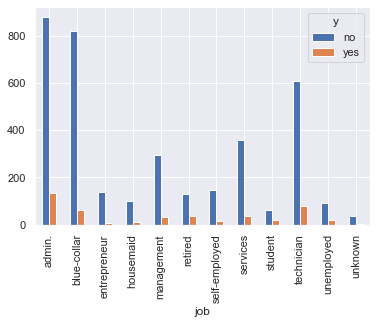

In [38]:
print(pd.crosstab(data.job,data.y,margins=True))
pd.crosstab(data.job,data.y).plot(kind='bar')

y           no  yes   All
marital                  
divorced   403   43   446
married   2257  252  2509
single     998  155  1153
unknown     10    1    11
All       3668  451  4119


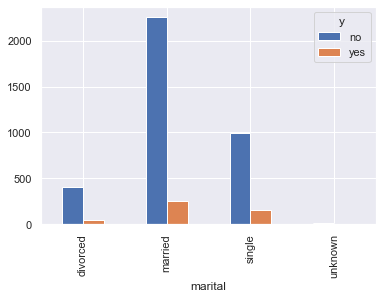

In [39]:
print(pd.crosstab(data.marital,data.y,margins=True))
pd.crosstab(data.marital,data.y).plot(kind='bar')

y                      no  yes   All
education                           
basic.4y              391   38   429
basic.6y              211   17   228
basic.9y              531   43   574
high.school           824   97   921
illiterate              1    0     1
professional.course   470   65   535
university.degree    1099  165  1264
unknown               141   26   167
All                  3668  451  4119


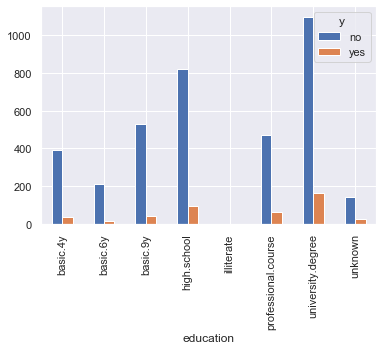

In [40]:
print(pd.crosstab(data.education,data.y,margins=True))
pd.crosstab(data.education,data.y).plot(kind='bar')

y          no  yes   All
default                 
no       2913  402  3315
unknown   754   49   803
yes         1    0     1
All      3668  451  4119


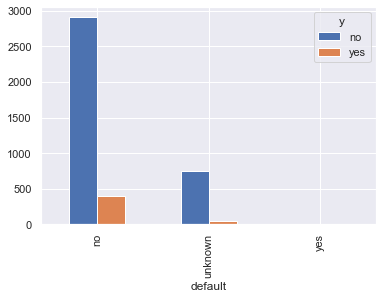

In [41]:
print(pd.crosstab(data.default,data.y,margins=True))
pd.crosstab(data.default,data.y).plot(kind='bar')

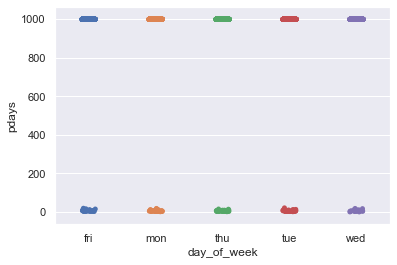

In [45]:
sns.stripplot(x='day_of_week',y='pdays',data=data)

In [81]:
from sklearn.preprocessing import LabelEncoder
tgt_col =['y']

cat_cols = [col for col in data.nunique()[data.nunique() <15].index if col not in tgt_col]
num_cols = [col for col in data.columns if col not in cat_cols + tgt_col]
bin_cols = [col for col in data.nunique()[data.nunique() ==2].index ]
mul_cols = [col for col in cat_cols if col not in bin_cols ]

In [82]:
le = LabelEncoder()
for col in bin_cols :
    data[col] = le.fit_transform(data[col])

In [83]:
data = pd.get_dummies(data = data,columns = mul_cols)

In [84]:
data.shape

(4119, 88)

In [86]:
data_bank = data
from sklearn.preprocessing import MinMaxScaler
minmax =MinMaxScaler()
data_bank[num_cols] = minmax.fit_transform(data[num_cols].values)

In [87]:
data_bank.head()

,age,contact,duration,campaign,pdays,cons.price.idx,cons.conf.idx,euribor3m,y,job_admin.,...,nr.employed_4991.6,nr.employed_5008.7,nr.employed_5017.5,nr.employed_5023.5,nr.employed_5076.2,nr.employed_5099.1,nr.employed_5176.3,nr.employed_5191.0,nr.employed_5195.8,nr.employed_5228.1
0,0.171429,0,0.133681,0.029412,1.0,0.269680,0.192469,0.153741,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.300000,1,0.094977,0.088235,1.0,0.698753,0.602510,0.956916,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.100000,1,0.062311,0.000000,1.0,0.882307,0.376569,0.981179,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.285714,1,0.004666,0.058824,1.0,0.882307,0.376569,0.980499,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.414286,0,0.015921,0.000000,1.0,0.389322,0.368201,0.806349,0,1,...,0,0,0,0,0,0,0,0,1,0


In [88]:
Y = data_bank['y']
data_bank = data_bank.drop('y',axis = 1)

In [89]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=3)
X = pca.fit_transform(data_bank)

In [95]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split (X,Y,test_size = 0.30,random_state = 12)

In [96]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [97]:
predicted = model.predict(x_test)

In [102]:
from sklearn.metrics import confusion_matrix,classification_report
print (confusion_matrix(y_test,predicted),'\n',classification_report(y_test,predicted))

[[998 106]
 [ 91  41]] 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      1104
           1       0.28      0.31      0.29       132

    accuracy                           0.84      1236
   macro avg       0.60      0.61      0.60      1236
weighted avg       0.85      0.84      0.84      1236



In [106]:
print ('Accuracy of Decision tree Classifier is ',metrics.accuracy_score(y_test,predicted) )

Accuracy of Decision tree Classifier is  0.8406148867313916


In [120]:
from sklearn.model_selection import GridSearchCV
model_grid = GridSearchCV(model,param_grid=dict(min_samples_split =range(10,50,100)),cv= 10,scoring = 'accuracy')
model_grid.fit(x_train,y_train)
pred_grid = model_grid.predict(x_test)
print (confusion_matrix(y_test,pred_grid),'\n',classification_report(y_test,pred_grid),'\n','Accuracy of Decision tree Classifier is ',metrics.accuracy_score(y_test,pred_grid) )

[[1025   79]
 [  95   37]] 
               precision    recall  f1-score   support

           0       0.92      0.93      0.92      1104
           1       0.32      0.28      0.30       132

    accuracy                           0.86      1236
   macro avg       0.62      0.60      0.61      1236
weighted avg       0.85      0.86      0.86      1236
 
 Accuracy of Decision tree Classifier is  0.8592233009708737


In [ ]:
from sklearn.tree import export_graphviz
from graphviz import Source 
from sklearn import tree
from Ipython.display import SVG

graph = Source(tree.export_graphviz(model,out_file = None,feature_names = x1.columns.tolist(),
                                    class_names =list(map(str,y.unique())),filled = True))

display(SVG(graph.pipe(format = 'svg')))

In [128]:
max_depths = np.linspace(1,100,100)
train_results= []
test_results = []
from sklearn.metrics import accuracy_score
for max_depth in max_depths :
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(x_train,y_train)
    train_results.append(accuracy_score(y_train,dt.predict(x_train)))
    test_results.append(accuracy_score(y_test,dt.predict(x_test)))
    

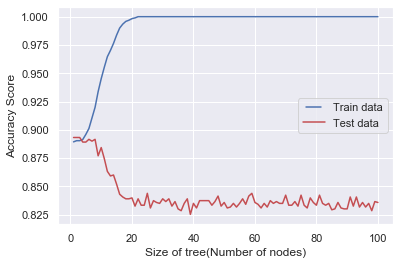

In [129]:
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_results, 'b', label='Train data')
line2, = plt.plot(max_depths, test_results, 'r', label='Test data')

plt.legend(handler_map = {line1 : HandlerLine2D(numpoints=2)})

plt.ylabel("Accuracy Score")
plt.xlabel("Size of tree(Number of nodes)")
plt.show()

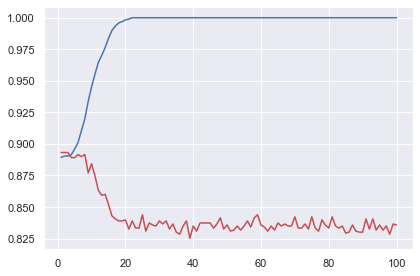

In [131]:
fig = plt.figure()
plt.plot(max_depths, train_results, 'b', label='Train data')
plt.plot(max_depths, test_results, 'r', label='Test data')
plt.tight_layout()
plt.show()